# Exploratory Analysis - MovieLens DataSet


In [1]:
# Εισαγωγή Βιβλιοθηκών
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Εισαγωγή Αρχείων 

In [2]:
# Εισαγωγή Αρχείων 
# Ταινίες
column_names_movies = ['movie_id', 'genre', 'year', 'title']
movies = pd.read_csv('movies.csv', delimiter = ';', names = column_names_movies,
                     header = 0)
movies.head()

,movie_id,genre,year,title
0,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story
1,2,Adventure|Children|Fantasy,1995,Jumanji
2,3,Comedy|Romance,1995,Grumpier Old Men
3,4,Comedy|Drama|Romance,1995,Waiting to Exhale
4,5,Comedy,1995,Father of the Bride Part II


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45656 entries, 0 to 45655
Data columns (total 4 columns):
movie_id    45656 non-null int64
genre       45656 non-null object
year        45656 non-null int64
title       45656 non-null object
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [4]:
# Αξιολογήσεις
column_names_ratings = ['user_id', 'movie_id', 'rating', 'date']
ratings = pd.read_csv('ratings.csv', delimiter = ',', names= column_names_ratings
                      , header = 0)
ratings.head()

,user_id,movie_id,rating,date
0,1,110,1.0,2015-03-09
1,1,147,4.5,2015-03-09
2,1,858,5.0,2015-03-09
3,1,1221,5.0,2015-03-09
4,1,1246,5.0,2015-03-09


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
user_id     int64
movie_id    int64
rating      float64
date        object
dtypes: float64(1), int64(2), object(1)
memory usage: 794.2+ MB


In [6]:
# Χρήστες
column_names_users = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
users = pd.read_csv('users.csv', delimiter = ';', names= column_names_users
                    , header = 0)
users.head(5)

,user_id,gender,age,occupation,zipcode
0,1,F,Under18,K-12student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,2460
4,5,M,25-34,writer,55455


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null object
occupation    6040 non-null object
zipcode       6040 non-null object
dtypes: int64(1), object(4)
memory usage: 236.0+ KB


In [8]:
# Περιγραφικά στατιστικά πίνακα ταινιών
movies.describe()

,movie_id,year
count,45656.000000,45656.000000
mean,96350.777422,1991.873730
std,57207.699897,24.023975
min,1.000000,1874.000000
25%,48773.000000,1978.000000
50%,108500.000000,2001.000000
75%,145022.500000,2010.000000
max,176279.000000,2017.000000


In [9]:
# Περιγραφικά στατιστικά πίνακα αξιολογήσεων
ratings.describe()

,user_id,movie_id,rating
count,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00
std,7.817620e+04,3.108526e+04,1.065443e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,6.716400e+04,1.073000e+03,3.000000e+00
50%,1.351630e+05,2.583000e+03,3.500000e+00
75%,2.026930e+05,6.503000e+03,4.000000e+00
max,2.708960e+05,1.762750e+05,5.000000e+00


In [10]:
# Περιγραφικά στατιστικά πίνακα χρηστών
users.describe()

,user_id
count,6040.000000
mean,3020.500000
std,1743.742145
min,1.000000
25%,1510.750000
50%,3020.500000
75%,4530.250000
max,6040.000000


### Ένωση πινάκων ταινιών - αξιολογήσεων 

In [11]:
df = pd.merge(movies,ratings,on='movie_id')
df.head()

,movie_id,genre,year,title,user_id,rating,date
0,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,8,4.0,2002-02-11
1,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,9,4.5,2004-01-11
2,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,12,4.0,1999-11-29
3,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,20,4.0,2013-05-12
4,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,24,4.0,2001-01-19


In [12]:
# Στοιχεία πίνακα
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26021540 entries, 0 to 26021539
Data columns (total 7 columns):
movie_id    int64
genre       object
year        int64
title       object
user_id     int64
rating      float64
date        object
dtypes: float64(1), int64(3), object(3)
memory usage: 1.6+ GB


In [13]:
# Μ.Ο. Βαθμού Αξιολόγησης Ταινιών
ratings['rating'].mean()

3.5280903543608817

In [14]:
# Σύνολο Ταινιών
movies['movie_id'].count()

45656

In [15]:
# Σύνολο Χρηστών
users['user_id'].count()

6040

In [16]:
# Σύνολο Αξιολογήσεων
ratings['rating'].count()

26024289

In [17]:
# Αριθμός Αξιολογήσεων με Βαθμό ίσο ή Μεγαλύτερο του 4.5
df[df['rating'] >= 4.5]['movie_id'].count()

5982150

In [18]:
# Ποσοστό επι του Συνόλου των Ταινιών με Βαθμό ίσο ή Μεγαλύτερο του 4.5 
df[df['rating'] >= 4.5]['movie_id'].count() / ratings['rating'].count()

0.22986795143567612

In [19]:
# Αριθμός Αξιολογήσεων με Βαθμό ίσο του 5
df[df['rating'] == 5]['movie_id'].count()

3812095

In [20]:
# Ποσοστό επι του Συνόλου των Αξιολογήσεων με Βαθμό ίσο του 5 
df[df['rating'] == 5]['movie_id'].count() / ratings['rating'].count()

0.1464821959208953

In [21]:
# Οι 10 Ταινίες με τις περισσότερες αξιολογήσεις
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump            91921
Shawshank Redemption    91082
Pulp Fiction            87901
Silence of the Lambs    84078
Matrix                  77960
Name: rating, dtype: int64

In [22]:
# Δημιουργία Dataframe: Ταινία - Αριθμός Αξιολογήσεων
df_ratingCount = pd.DataFrame(df.groupby('title', as_index = False)['rating'].count()
                              .rename(columns={'rating' : 'ratingCount'}))
df_ratingCount.sort_values('ratingCount',ascending=False).head(5)

,title,ratingCount
13016,Forrest Gump,91921
30771,Shawshank Redemption,91082
27891,Pulp Fiction,87901
31080,Silence of the Lambs,84078
22478,Matrix,77960


In [23]:
# Δημιουργία Dataframe: Ταινία - M.O. Βαθμο΄ύ
df_ratingMean = pd.DataFrame(df.groupby('title', as_index = False)['rating'].mean()
                              .rename(columns={'rating' : 'ratingMean'}))

df_ratingMean.sort_values('ratingMean',ascending=False).head(5)

,title,ratingMean
23649,Mounted Police Charge 1896,5.0
24107,My Last Year With The Nuns,5.0
12293,Ferocious Planet,5.0
36505,The Pilot's Wife,5.0
23965,Muzungu,5.0


In [24]:
# Προσ΄θήκη της Τιμής των Συνολικών Αξιολογήσεων στον Ενοποιημένο Πίνακα Ταινιών - Αξιολογήσεων
df_ext = pd.merge(df,df_ratingCount, on='title')
df_ext.head(5)

,movie_id,genre,year,title,user_id,rating,date,ratingCount
0,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,8,4.0,2002-02-11,66008
1,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,9,4.5,2004-01-11,66008
2,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,12,4.0,1999-11-29,66008
3,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,20,4.0,2013-05-12,66008
4,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,24,4.0,2001-01-19,66008


In [25]:
df_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26021540 entries, 0 to 26021539
Data columns (total 8 columns):
movie_id       int64
genre          object
year           int64
title          object
user_id        int64
rating         float64
date           object
ratingCount    int64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.7+ GB


In [26]:
# Δημιουργία Dataframe που Περιλαμβάνει τον Συνολικό Αριθμό Αξιλογήσεων και τον Μ.Ο. ανά Ταινία
df_movies_ext = pd.merge(df_ratingCount,df_ratingMean, on='title')
df_movies_ext.sort_values('ratingCount',ascending=False).head(5)

,title,ratingCount,ratingMean
13016,Forrest Gump,91921,4.052926
30771,Shawshank Redemption,91082,4.429015
27891,Pulp Fiction,87901,4.169975
31080,Silence of the Lambs,84078,4.152246
22478,Matrix,77960,4.154098


In [27]:
# Δημιουργία Dataframe: Κατανομή Αξιολογήσεων
df_rating_dist= pd.DataFrame(ratings.groupby('rating', as_index = False)['user_id'].count()
                         .rename(columns={'user_id' : 'ratingCount'}))
df_rating_dist.head(10)

,rating,ratingCount
0,0.5,404897
1,1.0,843310
2,1.5,403607
3,2.0,1762440
4,2.5,1255358
5,3.0,5256722
6,3.5,3116213
7,4.0,6998802
8,4.5,2170441
9,5.0,3812499


In [28]:
# Σύνολο Χρηστών ανά Φύλο 
users_by_gender = users.groupby('gender', as_index = False)['user_id'].count()
users_by_gender.rename(columns={'user_id' : 'Total'}).head()

,gender,Total
0,F,1852
1,M,4188


In [29]:
# Σύνολο Χρηστών ανά Επάγγελμα (κορυφαία 5)
users_by_occ =users.groupby('occupation', as_index = False)['user_id'].count()
users_by_occ = users_by_occ.rename(columns={'user_id' : 'Total'})
users_by_occ.sort_values('Total',ascending=False).head()

,occupation,Total
4,college/grad student,759
11,other,711
7,executive/managerial,679
1,academic/educator,528
17,technician/engineer,502


In [30]:
# Οι Χρήστες με τις Περισσότερες Αξιολογήσιες
ratings_per_user = ratings[['user_id', 'movie_id']].groupby('user_id').count()
ratings_per_user = ratings_per_user.rename(columns={'movie_id' : 'Total'})
ratings_per_user.sort_values('Total',ascending=False).head()

,Total
user_id,
45811,18276
8659,9279
270123,7638
179792,7515
228291,7410


In [31]:
# Οι πιο Δημοφιλείς Κατηγορίες Ταινιών (με τις περισσότερες αξιολογήσεις)
most_popular_genre = df.groupby('genre', as_index = False)['user_id'].count()
most_popular_genre = most_popular_genre.rename(columns={'user_id' : 'Total'})
most_popular_genre.sort_values('Total',ascending=False).head(10)

,genre,Total
1334,Drama,1847582
1070,Comedy,1628436
1213,Comedy|Romance,972499
1419,Drama|Romance,858135
1151,Comedy|Drama|Romance,764679
1117,Comedy|Drama,759590
1233,Crime|Drama,618194
194,Action|Adventure|Sci-Fi,596081
427,Action|Crime|Thriller,399452
196,Action|Adventure|Sci-Fi|Thriller,383774


In [32]:
# Σύνολο Ταινιών ανά Κατηγορία
movies_genres = movies.groupby('genre', as_index = False)['movie_id'].count()
movies_genres = movies_genres.rename(columns={'movie_id' : 'Total'})
movies_genres.sort_values('Total',ascending=False).head(10)

,genre,Total
1343,Drama,6792
1076,Comedy,4180
1319,Documentary,3336
0,(no genres listed),2630
1125,Comedy|Drama,1811
1428,Drama|Romance,1633
1222,Comedy|Romance,1183
1491,Horror,1093
1160,Comedy|Drama|Romance,875
1442,Drama|Thriller,695


## Γραφική Ανάλυση

In [34]:
# Επιλογή Στυλ Γραφημάτων
plt.style.use('ggplot')

# Εισαγωγή Βιβλιοθηκών
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Κατανομή Αριθμού Ταινιών ως προς τον Αριθμό Αξιολογήσεων (> 10000)

Text(0,0.5,'Number of movies')

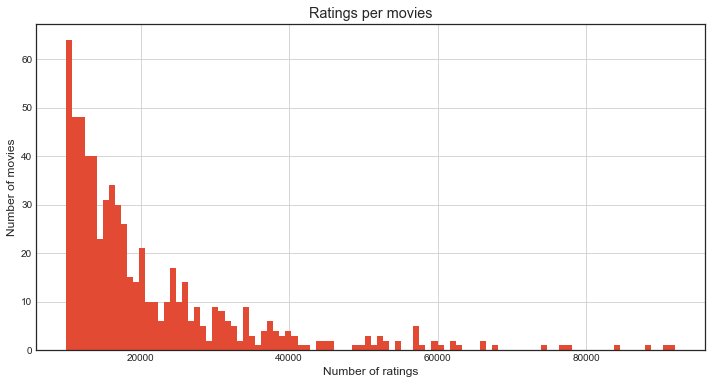

In [35]:
# Προκύπτει ΄ότι οι περισσότερες ταινίες έχουν σχεδόν ως 40000 αξιολογήσεις
plt.figure(figsize=(12,6))
df_movies_ext[df_movies_ext['ratingCount'] > 10000]['ratingCount'].hist(bins=100)
plt.title('Ratings per movies')
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')

#### Κατανομή Αριθμού Ταινιών ανά χρονιά (> 1960)

Text(0,0.5,'Number of movies')

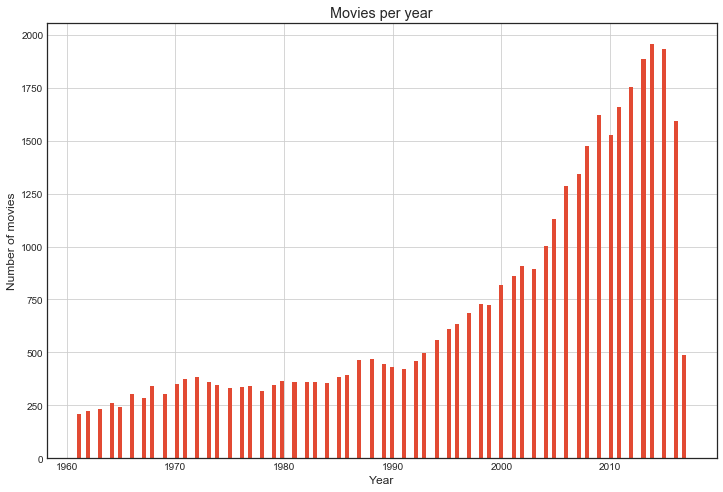

In [36]:
# Προκύπτει ΄ότι οι περισσότερες ταινίες είναι μετά το 1990
plt.figure(figsize=(12,8))
movies[movies['year'] > 1960]['year'].hist(bins=150)
plt.title('Movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

#### Σύνολο Χρηστών ανά Επάγγελμα

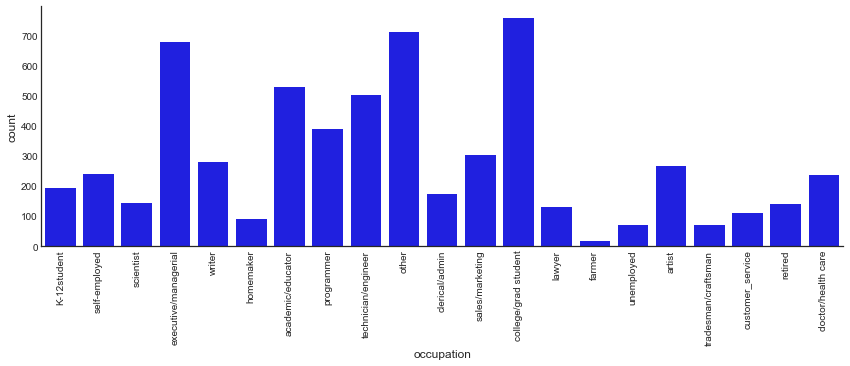

In [37]:
# Προκύπτει ΄ότι οι περισσότεροι χρήστες είναι Φοιτητές
sns.factorplot("occupation", data=users, aspect=3, kind="count", color="b").set_xticklabels(rotation=90)

#### Κατανομή Αξιολογήσεων ως προς τον Βαθμό 

d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


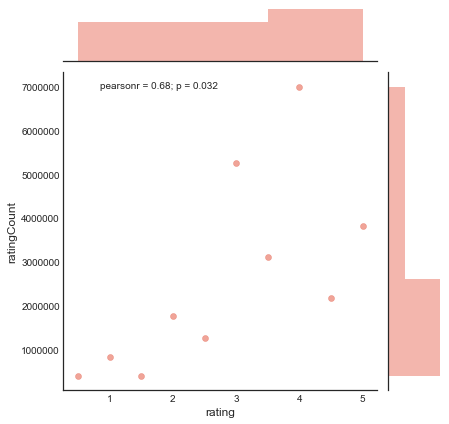

In [38]:
# Προκύπτει ΄ότι οι περισσότερες βαθμοί είναι ίσοι ή μεγαλύτεροι του 3
sns.jointplot(x='rating',y='ratingCount',data=df_rating_dist,alpha=0.5)

#### Σχέση Αριθμού Αξιολογήσεων - Μ.Ο. Βαθμού

d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


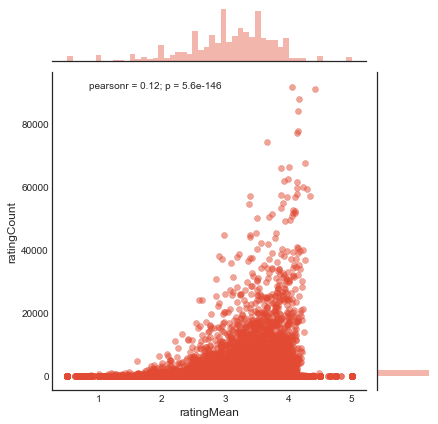

In [39]:
# Προκύπτει ότι οι ταινίες με τις περισσότερες αξιολογήσεις έχουν και μεγαλύτερο μ.ο. βαθμού
sns.jointplot(x='ratingMean',y='ratingCount',data= df_movies_ext,alpha=0.5)

#### Αριθμός Αξιολογήσεων ανά Χρήστη

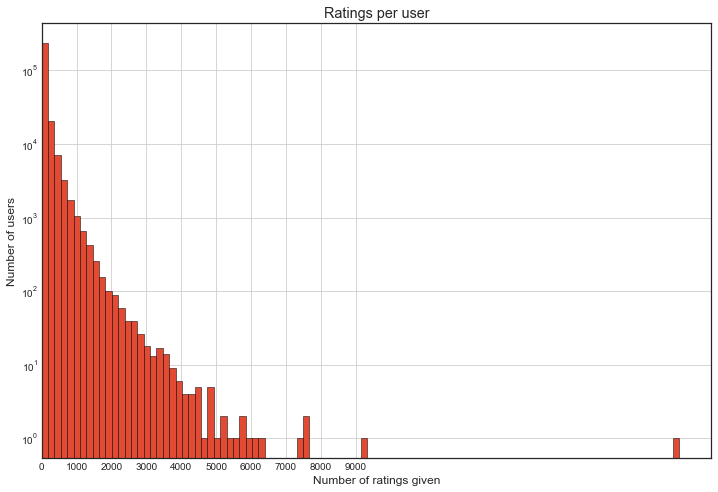

In [40]:
# Προκύπτει ότι οι περισσότεροι χρήστες έχουν λιγότερες απο 4000 αξιολογήσεις
plt.figure(figsize=(12,8))
ratings_per_user['Total'].hist(bins=100, edgecolor='black', log=True)
plt.title('Ratings per user')
plt.xlabel('Number of ratings given')
plt.ylabel('Number of users')
plt.xlim(0,)
plt.xticks(np.arange(0,10000,1000))
plt.show()